## 1 - Packages ##

First, you need to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- [jdc](https://alexhagen.github.io/jdc/) : Jupyter magic that allows defining classes over multiple jupyter notebook cells.
- plot: plot_decision_boundary is a utility function for plotting the decision boundary

In [32]:
!pip install jdc
import numpy as np
import matplotlib.pyplot as plt
import jdc
from plot import plot_decision_boundary

## 2 - Help Functions ##

Implement the helper function of sigmoid: $sigmoid(Z) = \frac{1}{1 + e^{-Z}}$

In [33]:
def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or a matrix.

    Return:
    s -- sigmoid(x)
    """
    ## YOUR CODE STARTS HERE ### 
    s = 1.0/(1+np.exp(-x))
    ### END CODE HERE ###
    
    return s

## 3 The Neural Network Class ##

You will implement a two-layer nerual network

In [34]:
class My_First_Awesome_NN():
    def __init__(self, n_x, n_h, n_y = 1, learning_rate = 0.1, eta = 0):
        """
        Argument:
        n_x -- size of the input layer
        n_h -- size of the hidden layer
        n_y -- size of the output layer, i.e., 1 in this assignment
        learning_rate -- the learning rate alpha
        eta -- used in leaky relu

        Define:
                self.W1 -- weight matrix of shape (n_h, n_x)
                self.b1 -- bias vector of shape (n_h, 1)
                self.W2 -- weight matrix of shape (n_y, n_h)
                self.b2 -- bias vector of shape (n_y, 1)
        """
        self.n_x = n_x
        self.n_h = n_h
        self.n_y = n_y
        self.alpha = learning_rate # learning rate
        self.eta = eta
        
        np.random.seed(7) # The seed will make sure your output matches mine although the initialization is random.
        
        ### YOUR CODE STARTS HERE ### (≈ 4 lines of code)
        # hint (1): you can use np.random.randn to initialize self.W1 and self.W2. 
        # hint (2): In order to keep the weights small, you'd better multiply the random weights by a small number ,e.g., 0.5 
        # hint (3): biases can be initialized to be zeros
        self.W1 = np.random.randn(n_h, n_x)*0.01
        self.b1 = np.zeros(shape=(n_h, 1))
        self.W2 = np.random.randn(n_y, n_h)*0.01
        self.b2 = np.zeros(shape=(n_y, 1))
        # self.W1 = np.random.randn(n_h, n_x)*0.01
        # self.b1 = np.zeros(shape=(n_h, 1))
        # self.W2 = np.random.randn(n_y, n_h)*0.01
        # self.b2 = np.zeros(shape=(n_y, 1))
        ### END CODE HERE ###

        assert (self.W1.shape == (n_h, n_x)), "Matrix shape incorrect: self.W1"
        assert (self.b1.shape == (n_h, 1)), "Vector shape incorrect: self.b1"
        assert (self.W2.shape == (n_y, n_h)), "Matrix shape incorrect: self.W2"
        assert (self.b2.shape == (n_y, 1)), "Vector shape incorrect: self.b2"        

### 3.1 - Forward Propagation ###

Implement Forward Propagation. Compute $Z^{[1]}, A^{[1]}, Z^{[2]}$ and $A^{[2]}$
$$Z^{[1]} =  W^{[1]} \cdot X + b^{[1]}\tag{1}$$ 
$$A^{[1]} =  leakyrelu(Z^{[1]})\tag{2}$$ 
$$Z^{[2]} =  W^{[2]} \cdot A^{[1]} + b^{[2]}\tag{3}$$
$$A^{[2]} =  sigmoid(Z^{[2]})\tag{4}$$ 

- We will use the *** leaky relu activation function *** in the hidden layer:
g(z) = a =  $\begin{cases}
      z & \text{if } z > 0 \\
      \eta * z & \text{otherwise}
    \end{cases}$  
- if $\eta = 0$, it becomes regular relu function

In [35]:
%%add_to My_First_Awesome_NN

def forward_propagation(self, X):
    """
    Argument:
    X -- input data of size (n_x, m)
   
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Implement Forward Propagation to calculate A2
    ### YOUR CODE STARTS HERE ### (≈ 4 lines of code)
    Z1 = np.dot(self.W1, X) + self.b1
    #Remember to use leaky relu as the actiation function
    A1 = np.where(Z1 > 0, Z1, Z1 * 0.01)
    # Start to handle the output layer
    Z2 = np.dot(self.W2, A1) + self.b2
    #Remember to use sigmoid function in the output layer
    A2 = sigmoid(Z2)
    ### END CODE HERE ###
    
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

### 3.2 - Back Propagation ###

Based on the cache obtained during forward propagation, please implement the backward propagation.
<img src="images/gredient-descent.png" style="width:400px;height:200px;">

- Hint:
    - To compute $dZ^{[1]}$, you will need to compute $g^{'}(Z^{[1]})$. Since the activation function is leaky relu, 
    $g^{'}(z) =  \begin{cases}
      1 & \text{if } z > 0 \\
      \eta  & \text{otherwise}
    \end{cases}$  

In [36]:
%%add_to My_First_Awesome_NN
def backward_propagation(self, cache, X, Y):
    """
    Implement the backward propagation
    
    Arguments:
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (n, m)
    Y -- "true" labels vector of shape (1, m)
    
    Returns:
    grads -- a python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
        
    # Retrieve also A1 and A2 from dictionary "cache".
    ### YOUR CODE STARTS HERE ### (≈ 2 lines of code)
    A1 = cache['A1']
    Z1 = cache['Z1']
    A2 = cache['A2']
    ### END CODE HERE ###
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    ### YOUR CODE STARTS HERE ### (≈ 6 lines of code, corresponding to 6 equations above)
    dZ2 = A2 - Y
    dW2 = (1.0/m) * np.dot(dZ2, A1.T)
    db2 = (1.0/m) * np.sum(dZ2, axis=1, keepdims=True)
    # Calculate the derivative for leaky relu based on Z values. See the hint above
    dg_Z1 = np.where(Z1 > 0, 1, 0.01)
    # Calculate dZ1 based on the formula given above
    dZ1 = np.dot(self.W2.T, dZ2) * dg_Z1

    
    dW1 = (1.0/m) * np.dot(dZ1, X.T)
    db1 = (1.0/m) * np.sum(dZ1, axis=1, keepdims=True)
    ### END CODE HERE ###
    
    assert dZ2.shape == (self.n_y, m), "Matrix shape incorrect: dZ2"
    assert dW2.shape == (self.n_y, self.n_h), "Matrix shape incorrect: dW2"
    assert db2.shape == (self.n_y, 1), "Vector shape incorrect: db2"
    assert dZ1.shape == (self.n_h, m), "Matrix shape incorrect: dZ1"
    assert dW1.shape == (self.n_h, self.n_x), "Matrix shape incorrect: dW1"
    assert db1.shape == (self.n_h, 1), "Vector shape incorrect: db1"
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

### 3.3 - Compute Loss ###
The loss function:  $$L(W) = -\frac{1}{m} (Y * \log(A^{[2]}) + (1-Y) * \log(1-A^{[2]}))\tag{1}$$ 
- Hint: Here, * in the above equation is numpy.multiply(), i.e., element-wise multiplication

In [37]:
%%add_to My_First_Awesome_NN
def compute_loss(self, A2, Y):
    """
    Computes the cross-entropy loss
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    Returns:
    loss -- cross-entropy cost
    """
    
    m = Y.shape[0] # number of example

    # Compute the cross-entropy cost
    ### YOUR CODE STARTS HERE ### (≈ 1 to 2 lines of code)
    # You can do this in two steps or one step according to your preference
    logprobs = np.multiply(Y, np.log(A2)) + np.multiply((1 - Y), np.log(1 - A2))
    loss = (-1.0/m) * np.sum(logprobs)
    ### END CODE HERE ###
    
    loss = np.squeeze(loss)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    assert(isinstance(loss, float))
    
    return loss

### 3.4 - Update Weights ###
Apply the gredient descent weight update rule here

In [38]:
%%add_to My_First_Awesome_NN

def update_parameters(self, grads):
    """
    Updates parameters using the gradient descent update rule
    
    Arguments:
    
    grads -- a python dictionary containing gradients 
    
    """
    # Retrieve each gradient from the dictionary "grads"
    ### YOUR CODE STARTS HERE ### (≈ 4 lines of code)
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    ## END CODE HERE ###
    
    # Update rule for each parameter
    ### YOUR CODE STARTS HERE ### (≈ 4 lines of code)
    self.W1 -= self.alpha * dW1
    self.b1 -= self.alpha * db1
    self.W2 -= self.alpha * dW2
    self.b2 -= self.alpha * db2
    ### END CODE HERE ###
    

### 3.5 - Training ###
Implement the training process

In [39]:
%%add_to My_First_Awesome_NN

def fit(self, X, Y, num_epochs = 10000, print_loss=False):
    """
    Arguments:
    X -- dataset of shape (n, m)
    Y -- labels of shape (1, m)
    num_epochs -- Number of iterations in gradient descent iterations
    print_loss -- if True, print the loss every 1000 iterations
    
    """
    assert(self.n_x == X.shape[0])
    assert(self.n_y == Y.shape[0])
    
    losses = []
    
    # Loop (gradient descent)
    for i in range(0, num_epochs):
         
        ### YOUR CODE STARTS HERE ### (≈ 4 lines of code)
        # Forward propagation. Inputs: "X". Outputs: "A2, cache".
        A2, cache = forward_propagation(self, X)

        # Loss function. Inputs: "A2, Y, parameters". Outputs: "loss".
        loss = compute_loss(self, A2, Y)
 
        # Backpropagation. Inputs: "cache, X, Y". Outputs: "grads".
        grads = backward_propagation(self, cache, X, Y)
 
        # Last step: Gradient descent parameter update. Inputs: " grads".
        update_parameters(self, grads)
        
        ### YOUR CODE ENDS HERE ###
        
        # Print the cost every 1000 iterations
        if print_loss and i % 1000 == 0:
            losses.append(loss)
            print ("Loss after iteration %i: %f" %(i, loss))
    
    return losses


### 3.6 - predict ###
**Hint**: prediction =  $\begin{cases}
      1 & \text{if } \hat y > 0.5 \\
      0 & \text{otherwise}
    \end{cases}$  

In [40]:
%%add_to My_First_Awesome_NN

def predict(self, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
   ### YOUR CODE STARTS HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(self, X)
    
    # hint: with numpy, you can apply a threshold to a vector, e.g., M > 0.5, and it will return a vector of true/false
    predictions = np.where(A2 > 0.5, 1, 0)
    ### END CODE HERE ###
    
    return predictions

## 4. Experiments ##

### 4.1 - Load and display data ###

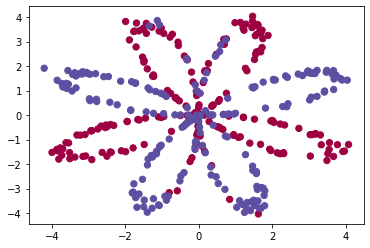

In [41]:
data = np.loadtxt('data.txt', delimiter=',')
X = data[:, :-1].T
Y = data[:, -1].T
plt.scatter(X[0, :], X[1, :], c=Y,s=40, cmap=plt.cm.Spectral)

### 4.2 - Display the shape of X, Y, and # of training examples

In [42]:
Y = Y.reshape(1, -1)
### YOUR CODE STARTS HERE ### (≈ 3 lines of code)
shape_X = X.shape
shape_Y = Y.shape
m = X.shape[1]     # training set size
### END CODE HERE ###

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('There are m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
There are m = 400 training examples!


### 4.3 - Define the model ###

In [122]:
# Build an ANN model with a n_h-dimensional hidden layer
### YOUR EXPERIMENT STARTS HERE ###
num_hidden_units = 7
alpha = 0.9
eta = 3
num_of_epochs = 20000
### END CODE HERE ###

model = My_First_Awesome_NN(n_x=X.shape[0], n_h = num_hidden_units, n_y = 1, learning_rate=alpha, eta = eta)
losses = model.fit(X, Y, num_epochs = num_of_epochs, print_loss=True)

Loss after iteration 0: 277.255280
Loss after iteration 1000: 187.075976
Loss after iteration 2000: 186.160536
Loss after iteration 3000: 148.973637
Loss after iteration 4000: 180.189142
Loss after iteration 5000: 191.607456
Loss after iteration 6000: 140.737198
Loss after iteration 7000: 137.702825
Loss after iteration 8000: 196.182069
Loss after iteration 9000: 139.392356
Loss after iteration 10000: 141.332795
Loss after iteration 11000: 137.409447
Loss after iteration 12000: 145.004141
Loss after iteration 13000: 161.590631
Loss after iteration 14000: 144.430031
Loss after iteration 15000: 137.698872
Loss after iteration 16000: 138.722441
Loss after iteration 17000: 140.085454
Loss after iteration 18000: 161.380893
Loss after iteration 19000: 146.807805


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 7')

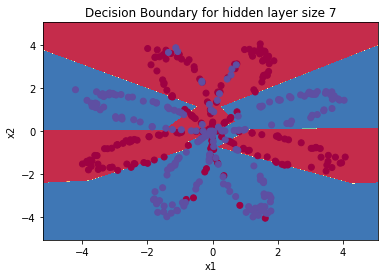

In [123]:
# Plot the decision boundary
plot_decision_boundary(lambda x: model.predict(x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(num_hidden_units))

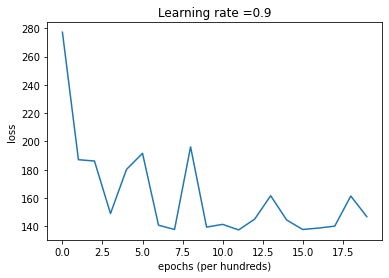

In [124]:
#plot learning curve
losses = np.squeeze(losses)
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epochs (per hundreds)')
plt.title("Learning rate =" + str(alpha))
plt.show()

In [125]:
# Print accuracy
predictions = model.predict(X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 86%
